## Predicting Password Strength

In [1]:
# Importing Libraraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#### Load the Data

In [2]:
# Load your dataset
data = pd.read_csv('data.csv', on_bad_lines='skip')
data = data.dropna()
data = data.iloc[:100000]
data.head(n=3)

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1


### Data Exploration

In [4]:
data.shape

(100000, 2)

In [5]:
len(data['password'].unique())

100000

As we can see all the passwords in our dataset are unique. This means that the dataset isn't possibly a good representation of a real-life scenario.

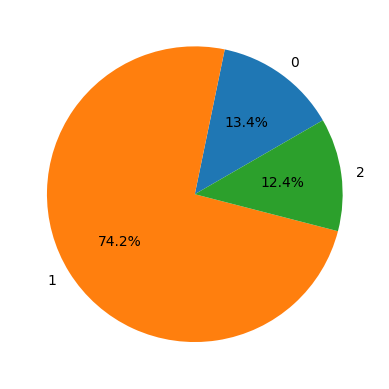

In [6]:
stgth = data.groupby(['strength']).size().reset_index().rename(columns={0:'size'})

fig, ax = plt.subplots()
ax.pie(stgth['size'].tolist(), labels=stgth['strength'].tolist(), autopct='%1.1f%%', startangle=30)
plt.show()

From this chart, we see that the password strength is defined as 0, 1 and 2 (with 0 being the lowest and 2 being the highest). **74%** of the passwords in our dataset have the the password strength 1.

### Modelling

In [7]:
# Define features and labels
X = data['password']
y = data['strength']

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###TF-IDF
TF-IDF takes into account both the frequency of characters in a password and how unique those characters are across the entire dataset. Common characters like 'a', 'b', etc., that appear in many passwords but don't provide much discriminative information are given lower importance. Rare characters that appear only in a few passwords but could be indicative of strong passwords are given higher importance.

In [9]:
# Convert passwords to TF-IDF features
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

###Random Forest Classifier:
Random Forest builds multiple decision trees during training and aggregates their predictions to make a final decision. Each tree is trained on a random subset of the data and features, reducing overfitting and increasing generalization.

###Gradient Boosting Classifier:
Gradient Boosting builds a sequence of weak learners, with each new learner focusing on correcting the mistakes of the previous ones. It assigns higher weights to misclassified samples, leading to a stronger final model.

###Support Vector Machine (SVM):
SVM aims to find the optimal hyperplane that maximizes the margin between classes in feature space. It transforms data into a higher-dimensional space to make complex separation decisions.

In [10]:
# Initialize and train classifiers
classifiers = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    SVC(kernel='linear', C=1)
]

In [11]:
for classifier in classifiers:
    classifier_name = type(classifier).__name__
    print(f"Training {classifier_name}...")
    classifier.fit(X_train_tfidf, y_train)
    print(f"{classifier_name} trained.")
    print("=" * 60)

Training RandomForestClassifier...
RandomForestClassifier trained.
Training GradientBoostingClassifier...
GradientBoostingClassifier trained.
Training SVC...
SVC trained.


In [12]:
# Make predictions and print classification reports
for i, classifier in enumerate(classifiers):
    predictions = classifier.predict(X_test_tfidf)
    classifier_name = type(classifier).__name__

    print(f"Classification Report for {classifier_name}:")
    print(classification_report(y_test, predictions))
    print("=" * 60)

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.89      0.54      0.67      2741
           1       0.89      0.99      0.94     14748
           2       0.98      0.79      0.88      2511

    accuracy                           0.90     20000
   macro avg       0.92      0.77      0.83     20000
weighted avg       0.90      0.90      0.89     20000

Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.89      0.57      0.70      2741
           1       0.91      0.98      0.94     14748
           2       0.96      0.89      0.92      2511

    accuracy                           0.91     20000
   macro avg       0.92      0.81      0.85     20000
weighted avg       0.91      0.91      0.91     20000

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.80      0.52      0.63     

In [16]:
# Interactive input for password classification
label_mapping = {
    0: 'Weak',
    1: 'Normal',
    2: 'Strong'
}

while True:
    input_password = input("Enter a password (or 'exit' to quit): ")
    if input_password == 'exit':
        break

    input_tfidf = vectorizer.transform([input_password])

    predictions = {}
    for idx, classifier in enumerate(classifiers):
        classifier_name = type(classifier).__name__
        prediction = classifier.predict(input_tfidf)[0]
        predictions[classifier_name] = label_mapping[prediction]

    print("Password Strength Predictions:")
    for classifier_name, prediction in predictions.items():
        print(f"{classifier_name}: {prediction}")

print("Goodbye!")

Enter a password (or 'exit' to quit): afsafwf
Password Strength Predictions:
RandomForestClassifier: Normal
GradientBoostingClassifier: Normal
SVC: Weak
Enter a password (or 'exit' to quit): 21j341u2#4q2%
Password Strength Predictions:
RandomForestClassifier: Normal
GradientBoostingClassifier: Normal
SVC: Strong
Enter a password (or 'exit' to quit): exit
Goodbye!
